In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy import array
from numpy import newaxis
import math
from scipy import stats
from subprocess import check_output
import seaborn as sns
# from keras.layers.core import Dense, Activation, Dropout
# from keras.layers.recurrent import LSTM
# from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time #helper libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import load_model


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
#load your data to train or predict on 
raw_data = pd.read_csv("big_df_adj.csv", low_memory=False)

raw_data.head(5)

,CBOE_VX1_FWd,CBOE_VX1_FWo,CBOE_VX1_FWh,CBOE_VX1_FWl,CBOE_VX1_FWs,CBOE_VX1_FWv,CBOE_VX1_FWpo,CME_US1_FWd,CME_US1_FWo,CME_US1_FWh,...,CME_RB1_FWs,CME_RB1_FWv,CME_RB1_FWpo,CME_HO1_FWd,CME_HO1_FWo,CME_HO1_FWh,CME_HO1_FWl,CME_HO1_FWs,CME_HO1_FWv,CME_HO1_FWpo
0,5/9/2019,17.97,19.15,17.80,17.875,184974,161014,5/9/2019,148.15625,149.09375,...,1.9754,71367,114534,5/9/2019,2.0564,2.0596,2.0215,2.0436,60625,99773
1,5/8/2019,17.85,18.38,17.40,17.925,176500,159705,5/8/2019,148.62500,149.18750,...,1.9750,86693,119390,5/8/2019,2.0364,2.0688,2.0280,2.0562,59613,106854
2,5/7/2019,16.65,18.70,16.21,17.725,260416,157094,5/7/2019,148.31250,148.84375,...,1.9487,84662,129289,5/7/2019,2.0620,2.0724,2.0209,2.0376,64338,113089
3,5/6/2019,16.05,17.20,16.00,16.325,148074,149534,5/6/2019,147.65625,148.75000,...,1.9966,78755,133277,5/6/2019,2.0646,2.0877,2.0271,2.0676,61984,118359
4,5/3/2019,16.22,16.25,15.50,15.575,84079,151941,5/3/2019,147.15625,147.65625,...,2.0265,72119,138861,5/3/2019,2.0675,2.0921,2.0550,2.0702,65633,121712


In [12]:

cols = [c for c in raw_data.columns if c.lower()[-1] == "s"]
df = raw_data[cols]
df.head(15)

,CBOE_VX1_FWs,CME_US1_FWs,CME_FV1_FWs,CME_C1_FWs,CME_RR1_FWs,CME_BO1_FWs,CME_S1_FWs,CME_W1_FWs,CME_AD1_FWs,CME_BP1_FWs,...,ICE_G1_FWs,ICE_O1_FWs,ICE_ATW1_FWs,ICE_SB1_FWs,ICE_M1_FWs,ICE_T1_FWs,CME_NG1_FWs,CME_CL1_FWs,CME_RB1_FWs,CME_HO1_FWs
0,17.875,148.68750,115.726562,353.25,10.935,26.630,812.75,429.50,0.7001,1.3048,...,629.50,2.04360,61.85,11.780,33.750,61.700,2.5950,61.700,1.97540,2.04360
1,17.925,148.21875,115.578125,364.25,10.950,27.000,827.25,439.00,0.6995,1.3030,...,636.75,2.05620,63.30,11.650,33.190,62.120,2.6100,62.120,1.97500,2.05620
2,17.725,148.75000,115.718750,366.50,10.935,27.100,830.75,439.50,0.7010,1.3091,...,630.50,2.03760,62.30,11.950,32.390,61.400,2.5370,61.400,1.94870,2.03760
3,16.325,147.81250,115.523438,364.25,10.700,27.130,830.25,437.25,0.7007,1.3128,...,636.25,2.06760,63.45,11.880,33.990,62.250,2.5240,62.250,1.99660,2.06760
4,15.575,147.37500,115.367188,370.75,10.755,27.350,842.25,438.00,0.7024,1.3193,...,643.50,2.07020,63.35,12.010,33.990,61.940,2.5670,61.940,2.02650,2.07020
5,16.225,146.93750,115.265625,370.50,10.705,27.500,843.25,444.00,0.7004,1.3056,...,633.00,2.07780,61.15,12.230,33.380,61.810,2.5890,61.810,2.01830,2.07780
6,16.325,147.59375,115.531250,368.50,10.560,27.650,851.75,436.00,0.7021,1.3079,...,637.75,2.09420,60.35,12.210,32.590,63.600,2.6200,63.600,2.06420,2.09420
7,15.505,147.46875,115.640625,360.65,10.519,27.820,851.45,426.70,0.7058,1.3069,...,637.80,2.07790,60.49,12.270,33.660,63.910,2.5750,63.910,2.07808,2.07856
8,15.245,146.96875,115.484375,357.85,10.501,28.066,855.45,431.85,0.7065,1.2968,...,630.80,2.05410,59.84,12.050,33.710,63.500,2.5930,63.500,2.05076,2.05430
9,14.805,147.59375,115.593750,355.25,10.297,27.648,859.05,438.00,0.7048,1.2959,...,623.65,2.05180,59.98,12.416,33.708,63.300,2.5772,63.300,2.07888,2.05160


In [5]:
# data_frame = df.sort_index(axis=1)
data_frame =raw_data
data_frame = data_frame.iloc[::-1]
data_frame = data_frame.sort_index(ascending=True, axis=1)
data_frame = data_frame.reindex(index=data_frame.index[::-1])
data_frame.columns


Index(['CBOE_VX1_FWd', 'CBOE_VX1_FWh', 'CBOE_VX1_FWl', 'CBOE_VX1_FWo',
       'CBOE_VX1_FWpo', 'CBOE_VX1_FWs', 'CBOE_VX1_FWv', 'CME_AD1_FWd',
       'CME_AD1_FWh', 'CME_AD1_FWl',
       ...
       'ICE_SB1_FWpo', 'ICE_SB1_FWs', 'ICE_SB1_FWv', 'ICE_T1_FWd',
       'ICE_T1_FWh', 'ICE_T1_FWl', 'ICE_T1_FWo', 'ICE_T1_FWpo', 'ICE_T1_FWs',
       'ICE_T1_FWv'],
      dtype='object', length=189)

In [4]:
plt.plot((data_frame["CME_RB1_FWs"]))


NameError: name 'data_frame' is not defined

In [7]:
h = "CME_RB1_FWs"
h[-1]
cols = [c for c in data_frame.columns if c.lower()[-1] == "s"]


In [8]:
cols = [c for c in data_frame.columns if c.lower()[-1] == "s"]
a_df = data_frame[cols]


In [10]:
df_o = a_df

NameError: name 'a_df' is not defined

In [10]:
df_z = np.abs(stats.zscore(a_df))
print(df_z)

[[0.53144123 1.70937613 2.04108209 ... 1.00384354 0.92618664 0.92039477]
 [0.54818406 1.73062187 1.88482278 ... 1.04282436 0.96799937 0.96298029]
 [0.48121275 1.67750752 1.84259054 ... 0.98528125 0.87150845 0.88997654]
 ...
 [1.13418309 2.06528362 0.59421    ... 0.60196988 0.03872256 0.14322934]
 [0.97512621 2.00862831 0.59421    ... 0.2938358  0.06766983 0.38353336]
 [0.64864104 2.0829884  0.26479849 ... 0.35137892 0.12852837 0.26388832]]


In [11]:
threshhold = 3
print(np.where(df_z>threshhold))
df_o = a_df[(df_z < threshhold).all(axis=1)]
print(f"Raw Data: {a_df.shape}")
print(f"Data with Z-Scores > {threshhold} removed: {df_o.shape}")

(array([  93,  102,  103,  104,  105,  106,  107,  108,  109,  110,  111,
        112,  113,  114,  115,  116,  117,  118,  120,  245,  246,  247,
        248,  317,  718,  719,  728,  729,  730,  731,  731,  732,  732,
        733,  734,  734,  735,  735,  736,  737,  816,  832,  833,  834,
        925,  928,  933,  961,  962,  963,  964,  965,  966,  969,  970,
        972, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1094,
       1095], dtype=int64), array([ 0, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 10, 10, 10, 10,  0, 16, 16,  4,  4,  4,  4, 16,  4, 16, 16,
        4, 16,  4, 16,  4,  4,  0,  5,  5,  5,  0,  0,  0,  4,  4,  4,  4,
        4,  4,  4,  4, 19, 17, 17, 17, 17, 17, 17, 17, 17, 17,  5,  5],
      dtype=int64))
Raw Data: (1096, 27)
Data with Z-Scores > 3 removed: (1033, 27)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


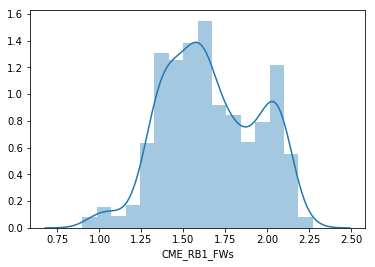

In [12]:
sns.distplot(df_o["CME_RB1_FWs"])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


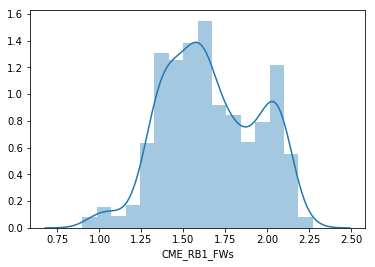

In [13]:
sns.distplot(df_o["CME_RB1_FWs"])

In [14]:
print("Skewness: %f" % df_o["CME_RB1_FWs"].skew())
print("Kurtosis: %f" % df_o['CME_RB1_FWs'].kurt())
print("Skewness: %f" % df_o["CME_RB1_FWs"].skew())
print("Kurtosis: %f" % df_o['CME_RB1_FWs'].kurt())

Skewness: 0.042544
Kurtosis: -0.716245
Skewness: 0.042544
Kurtosis: -0.716245


In [9]:
corrmat = df_o.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9, square=True);

NameError: name 'df_o' is not defined

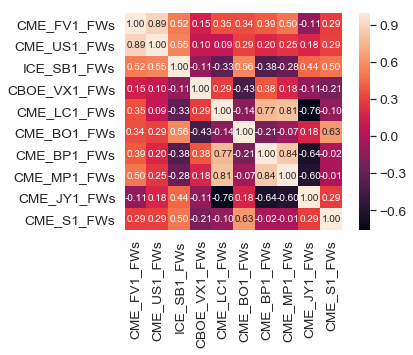

In [16]:
k = 10 #number of variables for heatmap
cols = corrmat.nsmallest(k, 'CME_RB1_FWs')['CME_RB1_FWs'].index
cm = np.corrcoef(a_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [8]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'CME_RB1_FWs')['CME_RB1_FWs'].index
cm = np.corrcoef(a_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

NameError: name 'corrmat' is not defined

Take the 10 most correlated features from the dataset

In [5]:
data = raw_data[cols]
data_frame = data.sort_index(axis=0 ,ascending=False)
data_frame.head(5)

NameError: name 'cols' is not defined

Setting up the data for the model 

In [31]:
dataset = data_frame[cols]
dataset = dataset.values
dataset = dataset.astype('float32')
datasetTest = data_frame['CME_RB1_FWs'].values.astype('float32')
datasetTest = datasetTest.reshape(-1,1)
dataset

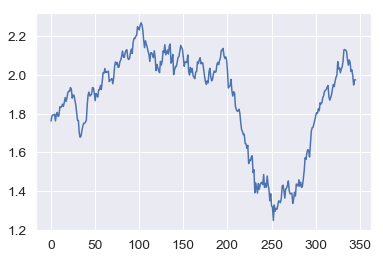

In [29]:
gas_show = data_frame['CME_RB1_FWs'].values.astype('float32')
len(gas_show)
plt.plot(gas_show[750:])

In [21]:
#scale the data, makes the model happy
np.random.seed(7)

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# dataset = scaler
datasetTest = scaler.fit_transform(datasetTest)


In [22]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print(len(train), len(test))


734 362


In [23]:
dataTest = datasetTest[train_size:len(datasetTest),:]
dataTestX, dataTestY = create_dataset(dataTest, look_back)
dataTestX = np.reshape(dataTestX, (dataTestX.shape[0], dataTestX.shape[1], 1))


NameError: name 'look_back' is not defined

In [24]:
look_back = 15 # sets how many steps out from the current step model is looking, 3 is two days in our timeseries. The current day and two days out.
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [25]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))


In [26]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(500, input_shape=(look_back, 15)))
model.add(Dense(225))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=10, batch_size=15, verbose=2)


Instructions for updating:
Colocations handled automatically by placer.


ValueError: Error when checking input: expected lstm_1_input to have shape (15, 15) but got array with shape (15, 1)

In [597]:
dataTestX.shape

(346, 15, 1)

In [720]:
model.save('3daymultilstm10.h5') #change file name! lstm_modelCLstep15, lstm_modelCL

In [20]:
model = load_model('15daymultilstm10.h5') #load a model 3daymultilstm10

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [24]:
# make predictions
trainPredict = model.predict(trainX, verbose=1)
testPredict = model.predict(testX, verbose=1)
# data_test_predict = model.predict(dataTestX, verbose=1)
trainPredct_dataset = np.zeros(shape=(len(trainPredict),27))
trainPredct_dataset[:,0] = trainPredict[:,0]
trainPredict = scaler.inverse_transform(trainPredct_dataset)
trainY_dataset = np.zeros(shape=(len(trainY),27))
trainY_dataset[:,0] = trainPredict[:,0]
trainY = scaler.inverse_transform([trainY])
testPredct_dataset = np.zeros(shape=(len(testPredict),10))
testPredct_dataset[:,0] = testPredict[:,0]
testPredict = scaler.inverse_transform(testPredct_dataset)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredict)
plt.plot(testPredict[2])

346/346 [==============================] - 0s 369us/step


ValueError: could not broadcast input array from shape (718) into shape (1)

In [741]:
data_test_predict = model.predict(dataTestX, verbose=1)
data_testpredict = np.zeros(shape=(len(data_test_predict),10))
data_testpredict[:,0] = data_test_predict[:,0]
datatestPredict = scaler.inverse_transform(data_test_predict)


346/346 [==============================] - 0s 403us/step


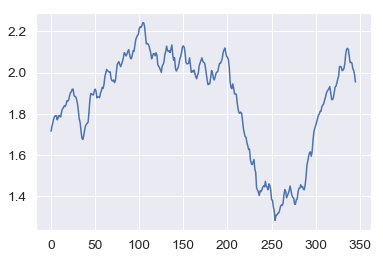

In [745]:
plt.plot(datatestPredict)

In [750]:
len(gas_show)

1096

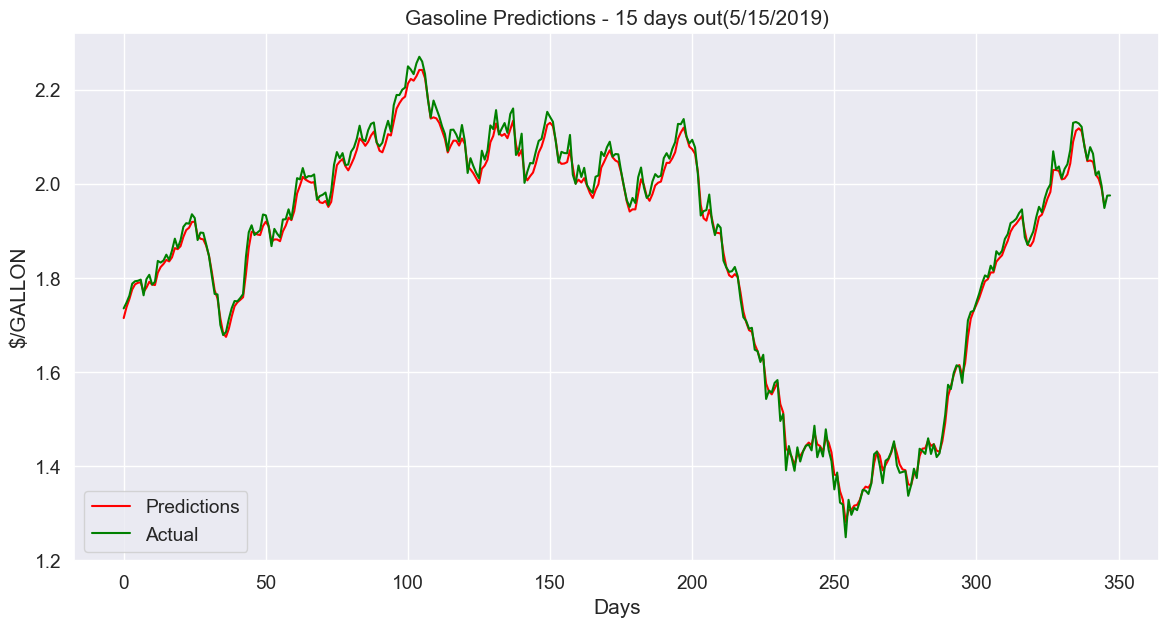

In [756]:
plt.figure(figsize=(14, 7), dpi=100)
plt.plot(datatestPredict, color = 'red')
plt.plot(gas_show[748:], color = 'green')
plt.title('Gasoline Predictions - 15 days out(5/15/2019)')
plt.ylabel('$/GALLON')
plt.xlabel('Days')
plt.legend(['Predictions', 'Actual '], loc='lower left')
plt.savefig('lstmmulti_15days.png')
plt.show()

KeyError: 'val_loss'

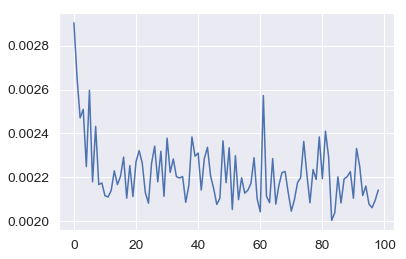

In [611]:

# summarize history for loss
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


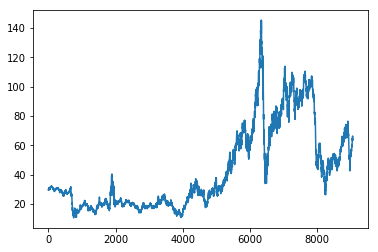

In [348]:
plt.plot(scaler.inverse_transform(dataset))


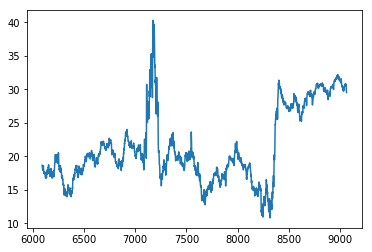

In [319]:
plt.plot(testPredictPlot)


In [438]:
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.01 RMSE
Test Score: 0.01 RMSE


Crude Oil Contract - Univariate

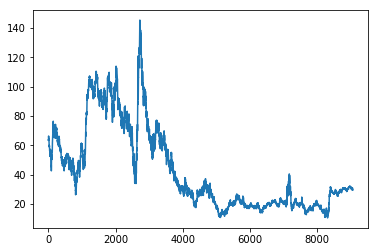